# Time Series Forecasting with LSTM on Air Passengers Dataset

## Importing The necessary Libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Input

## Loading The Data

In [ ]:
# Load the dataset
data = pd.read_csv('/content/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

## Plotting The Data

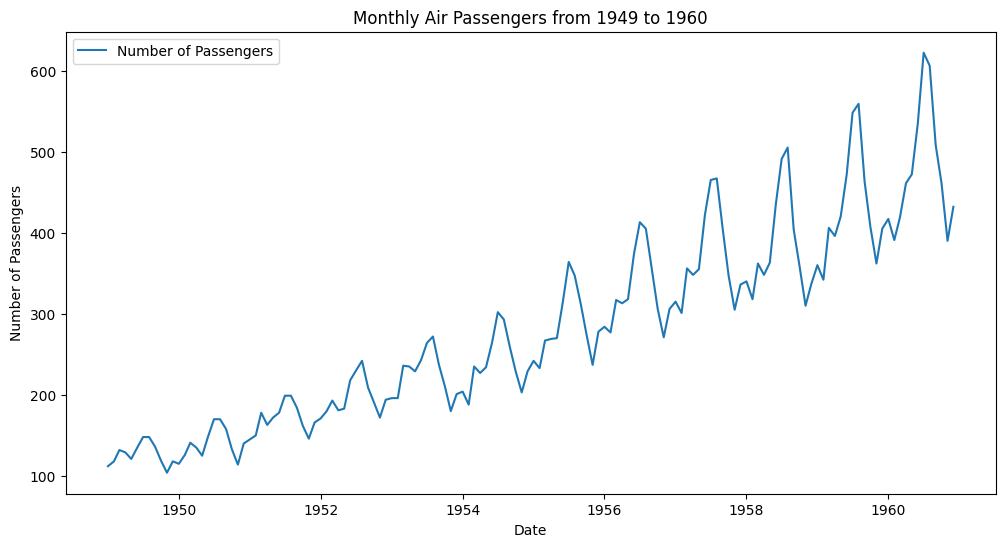

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['#Passengers'], label='Number of Passengers')
plt.title('Monthly Air Passengers from 1949 to 1960')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Data Preprocessing and Splitting

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

## Data Preparation for LSTM

In [ ]:
#create the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape the data into a format suitable for LSTM
time_step = 12  # Using 12 months of data to predict the next month
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Building The Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Use Input layer to define input shape
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Training The Model

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0867
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0273
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0078
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0075
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0071
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077
Epoch 16/100
4/4 ━━

## Model Predictions and Rescaling

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


## Plotting Predictions against Actual Data

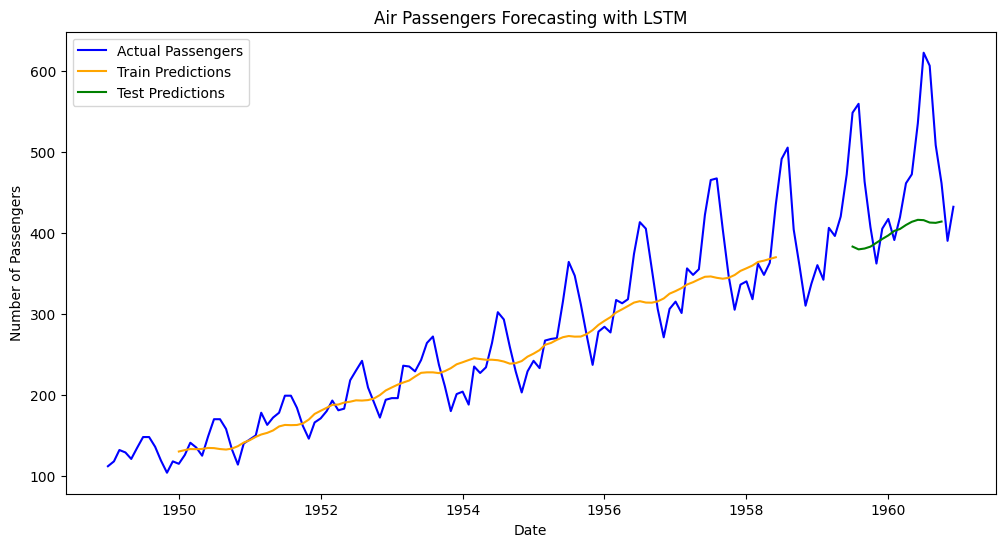

In [ ]:
# Flatten the predictions to 1D
train_predict = train_predict.flatten()
test_predict = test_predict.flatten()

train_index = data.index[time_step : train_size -1]

test_index = data.index[train_size + time_step - 1: train_size + time_step -1 + len(test_predict)]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['#Passengers'], label='Actual Passengers', color='blue')
plt.plot(train_index, train_predict, label='Train Predictions', color='orange')
plt.plot(test_index, test_predict, label='Test Predictions', color='green')
plt.title('Air Passengers Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Model Evaluation with RMSE

In [ ]:
#model evaluation
from sklearn.metrics import mean_squared_error

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 251.9846250246885
Test RMSE: 399.6515219610925
